In [73]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

In [74]:
image = cv2.imread('1.bmp', 0)[350:800,350:900]

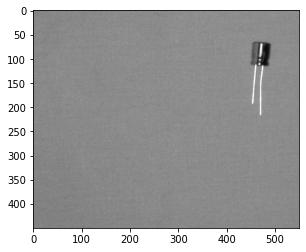

In [75]:
plt.imshow(image, cmap = 'gray')

In [76]:
gray = cv2.bilateralFilter(image, 11, 17, 17)

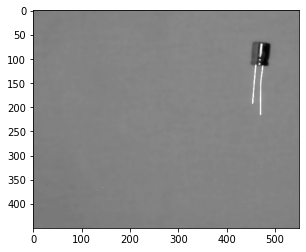

In [77]:
plt.imshow(gray, cmap = 'gray')

In [78]:
kernel = np.ones((3, 3), np.uint8)
gray_dilate = cv2.dilate(gray, kernel, iterations=7)

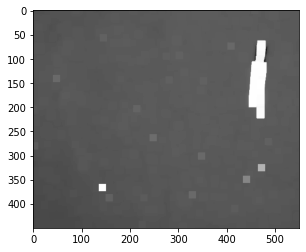

In [79]:
plt.imshow(gray_dilate, cmap = 'gray')

In [80]:
threshold = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
thresh = cv2.threshold(gray, 0, 255, threshold)[1]
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
print(len(cnts))

1


In [81]:
thresh_dilate = cv2.threshold(gray_dilate, 0, 255, threshold)[1]
cnts_dilate, hierarchy_dilate = cv2.findContours(thresh_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_dilate = sorted(cnts_dilate, key=cv2.contourArea, reverse=True)
print(len(cnts_dilate))

1


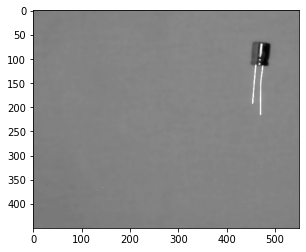

In [82]:
plt.imshow(gray, cmap = 'gray')

In [83]:
# for i in range(1):
#     rect = cv2.minAreaRect(cnts[i])
#     box = np.int0(cv2.boxPoints(rect))
#     cv2.drawContours(image, [box], 0, (0,255,0), 2)

#     rect_ = cv2.minAreaRect(cnts_dilate[i])
#     box_ = np.int0(cv2.boxPoints(rect_))
#     M = cv2.moments(box_)
#     if M['m00'] != 0:
#         cx = int(M['m10']/M['m00'])
#         cy = int(M['m01']/M['m00'])
#         # cv2.drawContours(image, [box_], 0, (0,255,0), 5)
#         cv2.circle(image, (cx, cy), 7, (0, 0, 255), -1)
#         cv2.putText(image, "center", (cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
#     print(f"x: {cx} y: {cy}")

In [84]:
for i in range(1):
    rect = cv2.minAreaRect(cnts[i])
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(image, [box], 0, (0,255,0), 2)

    # rect_ = cv2.minAreaRect(cnts_dilate[i])
    # box_ = np.int0(cv2.boxPoints(rect_))
    M = cv2.moments(box)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        # cv2.drawContours(image, [box_], 0, (0,255,0), 5)
        cv2.circle(image, (cx, cy), 5, (0, 0, 255), -1)
        # cv2.putText(image, "center",(cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    print(f"x: {cx} y: {cy}")

x: 470 y: 89


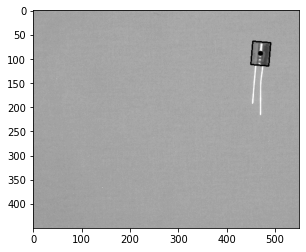

In [85]:
plt.imshow(image, cmap="gray")

In [86]:
image = cv2.imread('img0.jpg',0)